In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [74]:
#importing data 
df = pd.read_csv("movies.csv")
data = df.rename({'body-style': 'body_style'}, axis=1)
data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [75]:
#Categorising the target varible 
bins = [ 0,60,80, 100]
labels = ['FLOP', 'AVG', 'HIT']
data['binned'] = pd.cut(data['tomatometer_rating'], bins=bins, labels=labels)

In [76]:
#Labeling different num_cylinders as Label1
data['Label1']=0
data.loc[data["binned"]=="FLOP", ["Label1"]] = 0
data.loc[data["binned"]=="AVG", ["Label1"]] = 1
data.loc[data["binned"]=="HIT", ["Label1"]] = 2

In [77]:
data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,binned,Label1
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,FLOP,0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,HIT,2
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,67.0,24.0,Spilled,53.0,14684.0,2,16,8,AVG,1
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,100.0,54.0,Upright,97.0,105386.0,6,54,0,HIT,2
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,89.0,27.0,Upright,74.0,68918.0,5,24,3,HIT,2


Text(0.5, 1.0, 'Categorization of Movies')

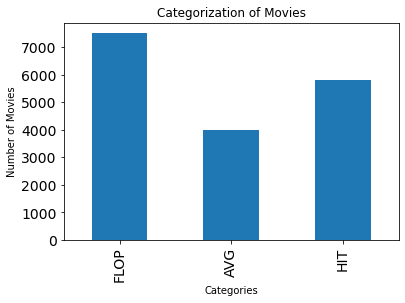

In [78]:
data.groupby(['binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [79]:
#Checking the new column
data.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,binned,Label1
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,FLOP,0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,HIT,2
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,67.0,24.0,Spilled,53.0,14684.0,2,16,8,AVG,1
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,100.0,54.0,Upright,97.0,105386.0,6,54,0,HIT,2
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,89.0,27.0,Upright,74.0,68918.0,5,24,3,HIT,2


In [80]:
#Shape of the dataset
data.shape

(17712, 24)

In [81]:
data.drop(columns=['critics_consensus'],inplace=True)

In [82]:
#Total null values present in each column
data.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
binned                               408
Label1                                 0
dtype: int64

In [83]:
#Droping the samples that have missing values
data.dropna(inplace=True)

In [84]:
#Final shape of the data after Droping missing values
data.shape

(14142, 23)

In [85]:
#List of variables in the datset
data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'binned', 'Label1'],
      dtype='object')

In [86]:
#Describing the categorical data
data.describe(include='object')

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,production_company,tomatometer_status,audience_status
count,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142
unique,14142,13723,14141,6,984,6909,11365,14140,5291,2049,2381,3,2
top,m/dukes,Alice in Wonderland,"Wisecracking mercenary Deadpool meets Russell,...",R,Drama,Alfred Hitchcock,Woody Allen,Werner Herzog,1988-01-01,2016-08-10,Warner Bros. Pictures,Rotten,Upright
freq,1,4,2,5555,1582,36,33,3,23,1025,480,6333,7640


In [87]:
#Dropping 2 columns
data.drop(columns=['rotten_tomatoes_link','movie_title'],inplace=True)
data.drop(columns=['original_release_date'],inplace=True)
data.drop(columns=['streaming_release_date'],inplace=True)
data.drop(columns=['tomatometer_status'],inplace=True)

In [88]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['movie_info', 'content_rating', 'genres', 'directors', 'authors',
       'actors',
       'production_company','audience_status']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [89]:
#A sample of data after label encoding
data.head()

,movie_info,content_rating,genres,directors,authors,actors,runtime,production_company,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,binned,Label1
0,3391,3,207,1089,2153,8504,119.0,5,49.0,149.0,0,53.0,254421.0,43,73,76,FLOP,0
1,8848,5,694,4910,8165,2113,90.0,1912,87.0,142.0,1,64.0,11574.0,44,123,19,HIT,2
2,1961,5,793,722,1187,3646,122.0,2268,67.0,24.0,0,53.0,14684.0,2,16,8,AVG,1
3,6362,2,633,6067,8975,8962,95.0,534,100.0,54.0,1,97.0,105386.0,6,54,0,HIT,2
4,7222,0,263,5470,3142,5804,127.0,592,89.0,27.0,1,74.0,68918.0,5,24,3,HIT,2


<AxesSubplot:>

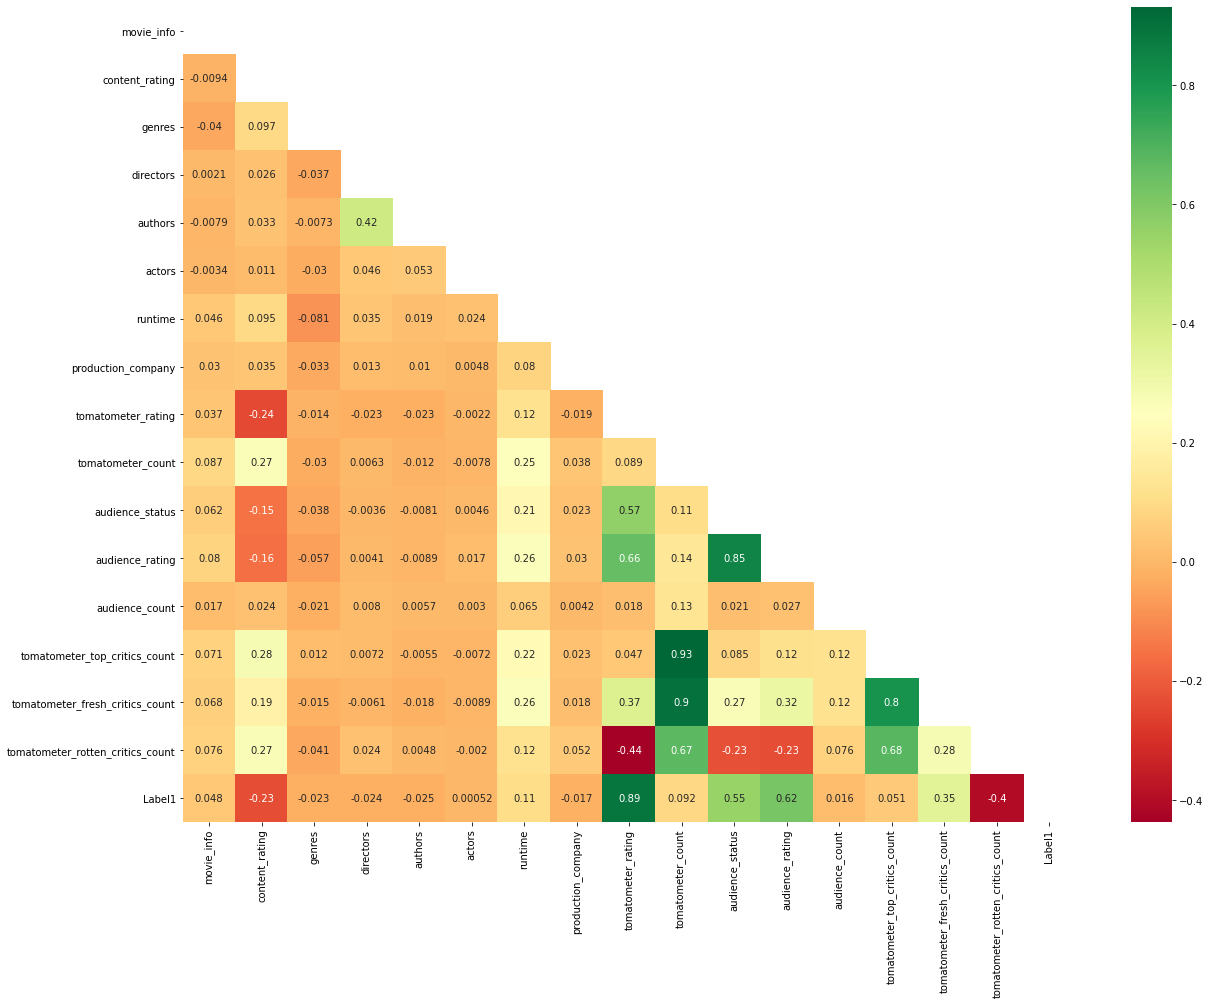

In [90]:
#Finding Correlation between variables
import seaborn as sns
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [91]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['tomatometer_rating'],inplace=True)

data.drop(columns=['binned'],inplace=True)

In [92]:
data.shape

(14142, 16)

In [93]:
#Independent Variables
X = data.iloc[:, 0:15].values
#Dependent/Target Variable
y = data.iloc[:, 15].values
y

array([0, 2, 1, ..., 2, 2, 0], dtype=int64)

In [94]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [95]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost fun

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\raora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
predictions = logmodel.predict(X_test)

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.47      0.98      0.64      2176
           1       0.11      0.00      0.00      1080
           2       0.39      0.02      0.05      1411

    accuracy                           0.47      4667
   macro avg       0.32      0.34      0.23      4667
weighted avg       0.36      0.47      0.31      4667



In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
X1= data.drop('Label1',axis=1)
y1 =data['Label1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [103]:
dtree = DecisionTreeClassifier()

In [104]:
dtree.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [105]:
predictions = dtree.predict(X_test)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2176
           1       0.98      0.98      0.98      1080
           2       0.99      0.99      0.99      1411

    accuracy                           0.99      4667
   macro avg       0.99      0.99      0.99      4667
weighted avg       0.99      0.99      0.99      4667



In [108]:
print(confusion_matrix(y_test,predictions))

[[2167    9    0]
 [  10 1062    8]
 [   0    8 1403]]
